# Autoregressive Models

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa  
import statsmodels.api as sm

In [4]:
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)        
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None

The AR(1) dataset can begenerated using the `arma_generate_sample` function from the `statsmodels.tsa module`

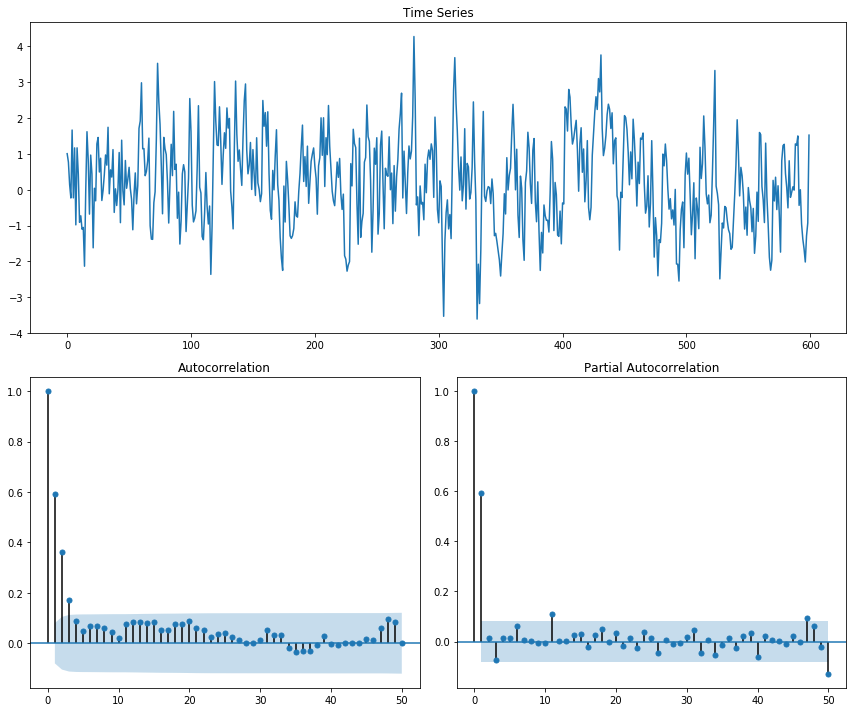

In [6]:
n = 600 # No. of samples

np.r_[1, -0.6]

# AR(1) dataset 

ar = np.r_[1, -0.6]
ma = np.r_[1, 0] # MA component is zero 
ar1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

Note above that PACF is significant for lag 1 since it is a AR(1) series 

For AR(2) process, PACF significant at 2 lags 

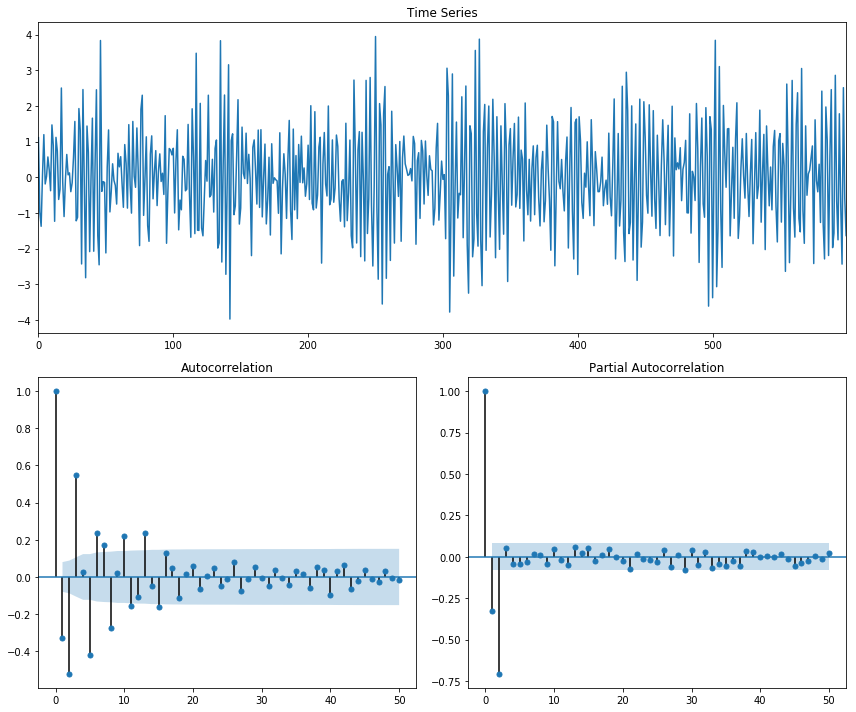

In [5]:
ar = np.r_[1, 0.6, 0.7]
ma = np.r_[1, 0]
ar2_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar2_data)

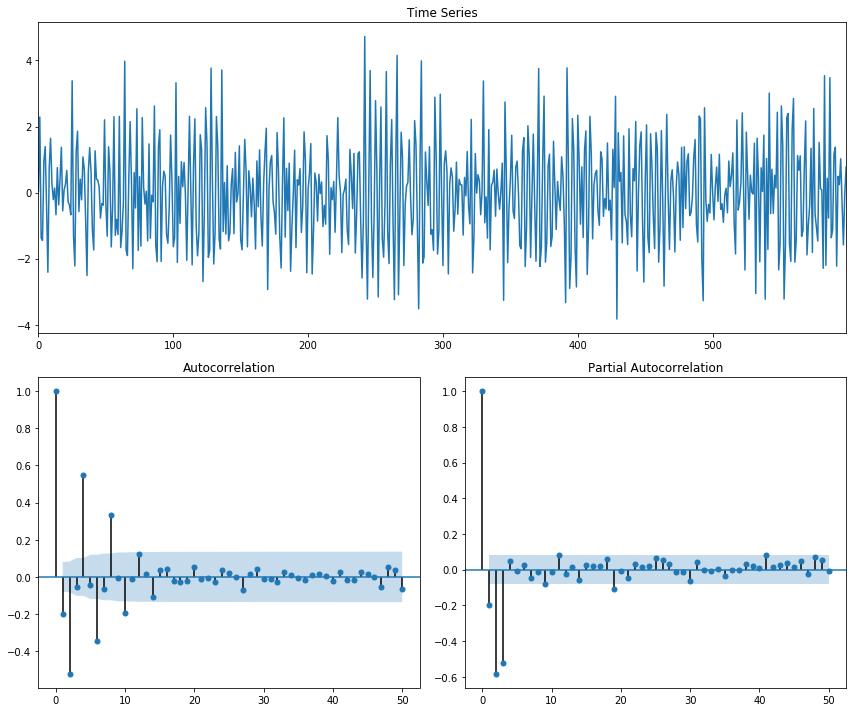

In [6]:
ar = np.r_[1, 0.6, 0.7, 0.5]
ma = np.r_[1, 0]
ar3_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar3_data)

In [7]:
ar1model = smtsa.ARMA(ar1_data.tolist(), order=(1, 0))
ar1=ar1model.fit(maxlag=30, method='mle', trend='nc')
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 0)   Log Likelihood                -823.266
Method:                           mle   S.D. of innovations              0.954
Date:                Fri, 08 Dec 2017   AIC                           1650.532
Time:                        13:03:34   BIC                           1659.326
Sample:                             0   HQIC                          1653.956
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.6485      0.031     20.927      0.000       0.588       0.709
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5419           +0.0000j            1.5419            0.0000
-----------------------------------------------------------------------------
"""

In [8]:
ar3 = smtsa.ARMA(ar3_data.tolist(), order=(3, 0)).fit(
    maxlag=30, method='mle', trend='nc')
ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(3, 0)   Log Likelihood                -868.570
Method:                           mle   S.D. of innovations              1.028
Date:                Fri, 08 Dec 2017   AIC                           1745.139
Time:                        13:04:42   BIC                           1762.727
Sample:                             0   HQIC                          1751.986
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.6186      0.035    -17.829      0.000      -0.687      -0.551
ar.L2.y       -0.7466      0.030    -24.795      0.000      -0.806      -0.688
ar.L3.y       -0.5253      0.035    -15.151      0.000      -0.593      -0.457
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0339           -1.1302j            1.1307           -0.2452
AR.2            0.0339           +1.1302j            1.1307            0.2452
AR.3           -1.4890           -0.0000j            1.4890           -0.5000
-----------------------------------------------------------------------------
"""

# Moving average models

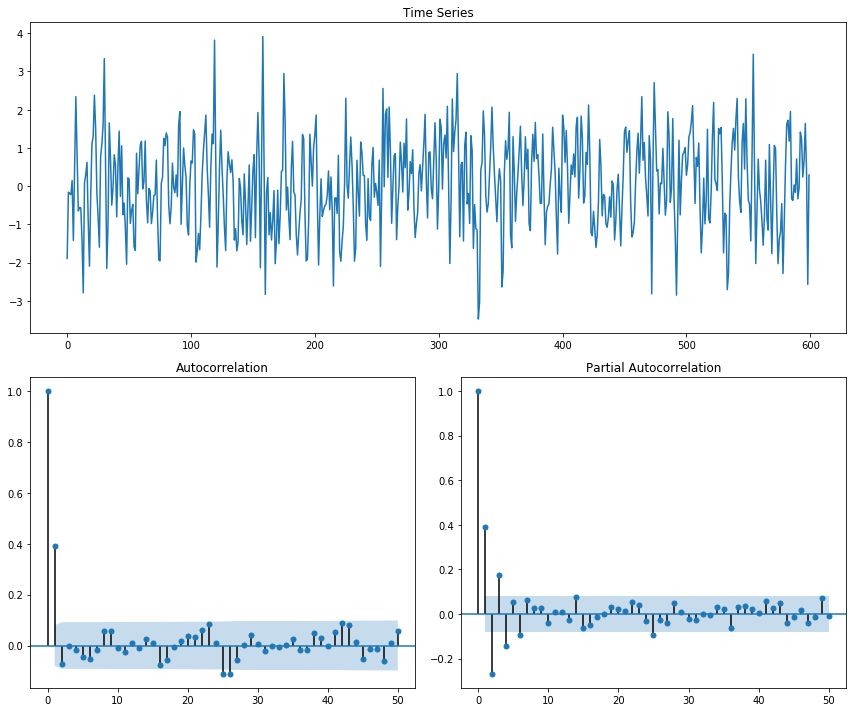

In [7]:
# MA(1) dataset
n = 600
ar = np.r_[1, -0]
ma = np.r_[1, 0.7]
ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ma1_data)

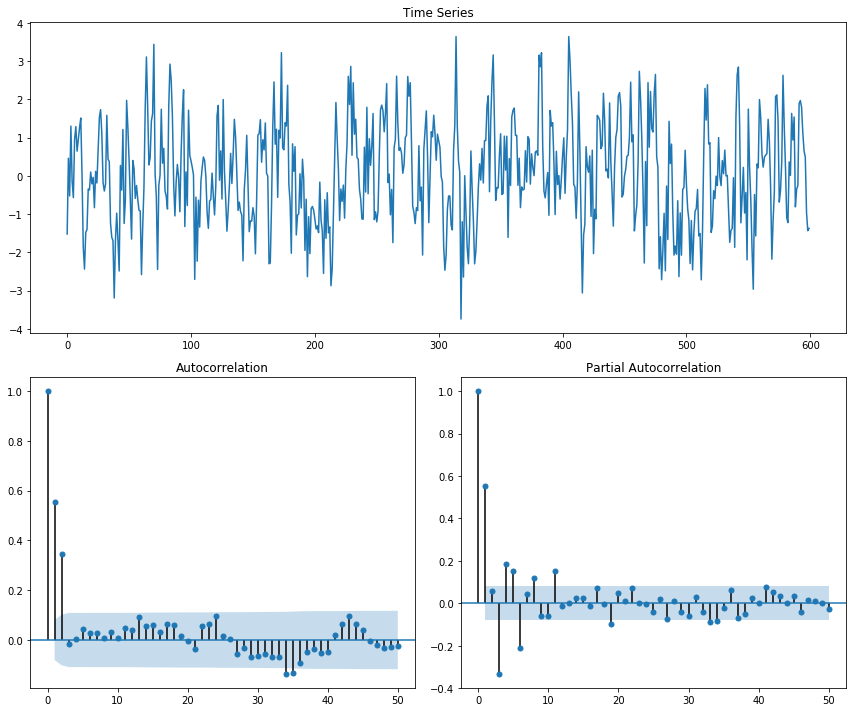

In [8]:
# MA(2) dataset

ar = np.r_[1, -0]
ma = np.r_[1, 0.6, 0.7]
ma2_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ma2_data)

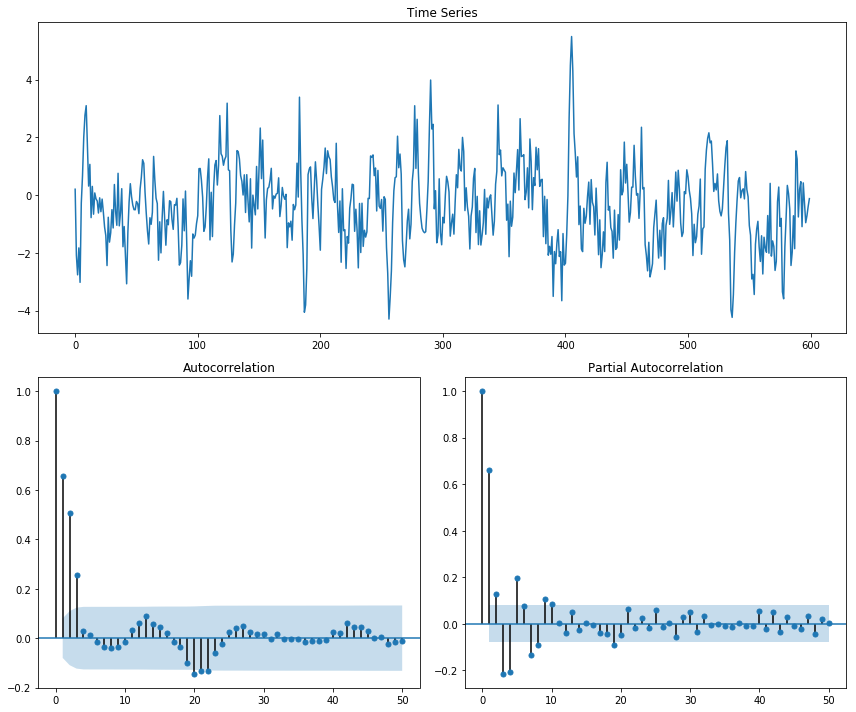

In [9]:
# MA(3) dataset
ar = np.r_[1, -0]
ma = np.r_[1, 0.6, 0.7, 0.5]
ma3_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ma3_data)

In [10]:
ma1 = smtsa.ARMA(ma1_data.tolist(), order=(0, 1)).fit(
    maxlag=30, method='mle', trend='nc')
ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 1)   Log Likelihood                -851.518
Method:                           mle   S.D. of innovations              1.000
Date:                Sat, 29 Jun 2019   AIC                           1707.037
Time:                        16:34:16   BIC                           1715.831
Sample:                             0   HQIC                          1710.460
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.6594      0.033     20.022      0.000       0.595       0.724
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.5164           +0.0000j            1.5164            0.5000
-----------------------------------------------------------------------------
"""

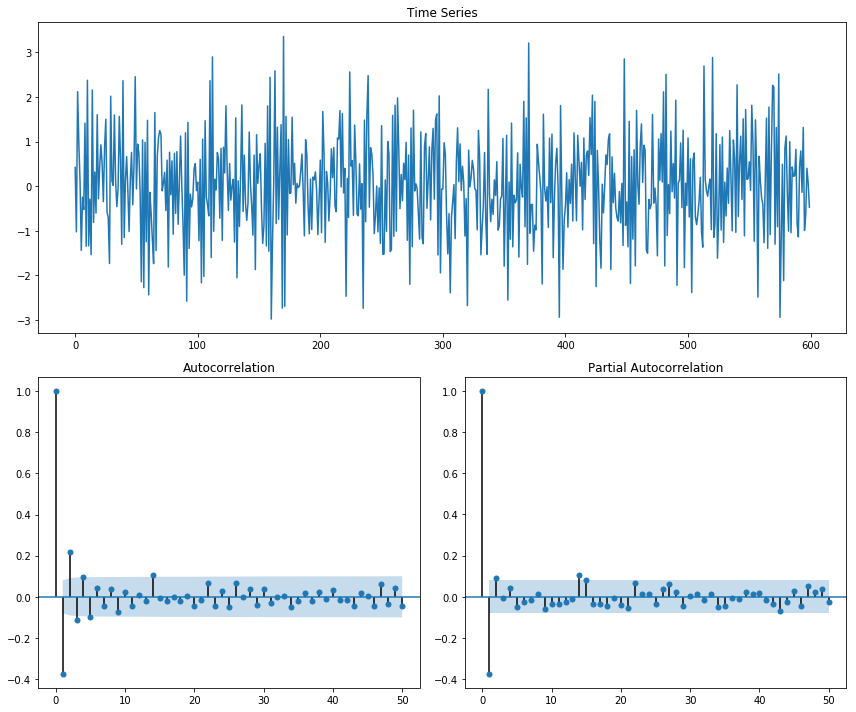

In [11]:
# ARMA(1,1)
n = 600
ar = np.r_[1, 0.6]
ma = np.r_[1, 0.3]
ar1ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1ma1_data )

In [13]:
ar1ma1 = smtsa.ARMA(ar1ma1_data.tolist(), order=(1, 1)).fit(
    maxlag=30, method='mle', trend='nc')
ar1ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 1)   Log Likelihood                -880.924
Method:                           mle   S.D. of innovations              1.050
Date:                Sat, 29 Jun 2019   AIC                           1767.848
Time:                        16:40:31   BIC                           1781.039
Sample:                             0   HQIC                          1772.983
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.5883      0.088     -6.680      0.000      -0.761      -0.416
ma.L1.y        0.2528      0.106      2.376      0.018       0.044       0.461
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6998           +0.0000j            1.6998            0.5000
MA.1           -3.9562           +0.0000j            3.9562            0.5000
-----------------------------------------------------------------------------
"""

There are multiple scenarios to select p and q; some of the thumb rules that can be used to determine the order of ARMA components are as follows:
1. Autocorrelation is exponentially decreasing and PACF has significant correlation at lag 1, then use the p parameter
* Autocorrelation is forming a sine-wave and PACF has significant correlation at lags 1 and 2, then use second-order value for p
* Autocorrelation has significant autocorrelation and PACF has exponential decay, then moving average is present and the q parameter needs to be set up
* Autocorrelation shows significant serial correlation and the PACF shows sinewave pattern, then set up a moving average q parameter

__ARIMA on IBM stock price data__

In [14]:
ibm_df = pd.read_csv('https://github.com/sri-spirited/Practical-Time-Series-Analysis-Python/raw/master/Data%20Files/ibm-common-stock-closing-prices.csv')

In [15]:
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'}, inplace=True)
ibm_df.head(2)

,Date,Close_Price
0,1962-01-02,572.0
1,1962-01-03,577.0


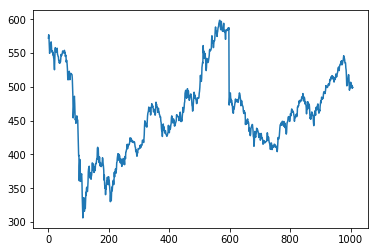

In [16]:
ibm_df.Close_Price.plot()

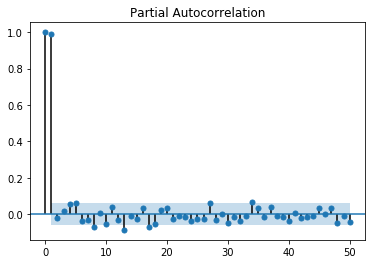

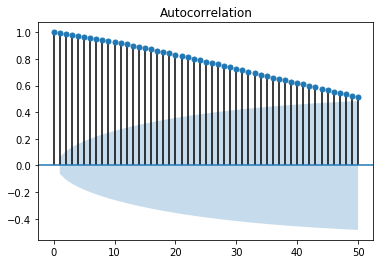

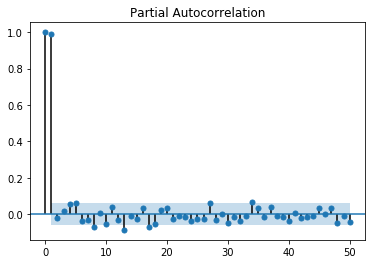

In [17]:
ibm_df['residual']=ibm_df['Close_Price']-ibm_df['Close_Price'].mean()
ibm_df=ibm_df.dropna()
plot_acf(ibm_df.Close_Price, lags=50)
plot_pacf(ibm_df.Close_Price, lags=50)

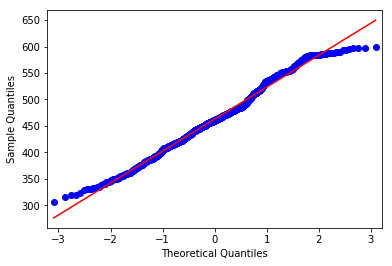

In [25]:
x = sm.qqplot(ibm_df['Close_Price'], line='s')

In [26]:
aicVal=[]
for ari in range(1, 3):
    for maj in range(0,3):
        arma_obj = smtsa.ARMA(ibm_df.Close_Price.tolist(), order=(ari, maj)).fit(maxlag=30, method='mle', trend='nc') 
        aicVal.append([ari, maj, arma_obj.aic])

In [27]:
aicVal

[[1, 0, 6702.766710082229],
 [1, 1, 6704.704833957159],
 [1, 2, 6706.643594204894],
 [2, 0, 6704.705792809978],
 [2, 1, 6705.736896128198],
 [2, 2, 6707.728880583525]]

In [28]:
arma_obj_fin = smtsa.ARMA(ibm_df.Close_Price.tolist(), order=(1, 0)).fit(maxlag=30, method='mle', trend='nc') 
ibm_df['ARMA']=arma_obj_fin.predict()
arma_obj_fin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1008
Model:                     ARMA(1, 0)   Log Likelihood               -3349.383
Method:                           mle   S.D. of innovations              6.683
Date:                Sat, 29 Jun 2019   AIC                           6702.767
Time:                        16:46:40   BIC                           6712.598
Sample:                             0   HQIC                          6706.502
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9999      0.000   9222.316      0.000       1.000       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

Text(0, 0.5, 'Closing price')

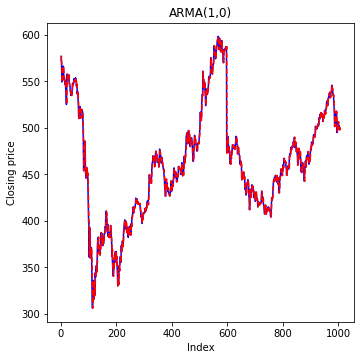

In [29]:
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)
ibm_df['Close_Price'].iloc[1:].plot(color='b', linestyle = '-', ax=axarr)
ibm_df['ARMA'].iloc[1:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARMA(1,0)')
plt.xlabel('Index')
plt.ylabel('Closing price')